<center>
<img src="images/FCN_h_c.png" alt="FCN" style="width:400px;"/>
</center>

<h1 style="font-family: 'Comic Sans MS', cursive; text-align: center; font-weight: bold; font-size: 30px;">
    Entrega Final - Módulo III <br>
    <span style="font-size: 26px; font-weight: normal;">
        Diplomatura de Posgrado en Ciencias de Datos aplicada a los sistemas naturales
    </span>
</h1>

## 0) **Desgloce del Trabajo Práctico**


<p style="text-align: justify; line-height: 1.6; font-size:16px">

- [1 - Integrantes](#1)
- [2 - Dataset Elegido](#2)
- [3 - Introducción:](#3)
    - [3.1 - Objetivos](#3.1)
    - [3.2 - Descripción](#3.2)
    - [3.3 - Metodología Usada](#3.3)
- [4 - Preparación del Entorno y Carga de Datos](#4)
    - [4.1 - Módulos](#4.1)
    - [4.2 - Carga de Datos](#4.2)
    - [4.3 - Unidad de análisis](#4.3)
- [5 - Análisis Exploratorio de los Datos (EDA)](#5)
    - [5.1 - Variable, tipo, descripción](5.1)
    - [5.2 - Dimensiones del dataset](#5.2)
    - [5.3 - Temperatura media histórica por país](#5.3)
- [6 - Regularización del dataset](#6)
    - [6.1 - Datos duplicados](#6.1)
    - [6.2 - Datos faltantes](#6.2)
    - [6.3 - Nuevas features (variables)](#6.3)
- [7 - Model](#7)
    - [7.1 - Modelo Random Forest Regressor (para cada país) sin tuneo de hiperparámetros](#7.1)
    - [7.2 - Modelo Random Forest Regressor (para cada país) con tuneo de hiperparámetros](#7.2)
    - [7.3 - Comparación de modelos en Argentina](#7.3)
- [8 - Guardado de datos](#8)
- [9 - Resultados Principales](#9)
- [10 - Conclusiones finales](#10)
- [11 - Referencias Bibliograficas](#11)
</p>

<a name='1'></a>
##  **1) Integrantes**

   * Ana Maciel
   * Gabriela Gonzalez Prieto
   * Virginia Chirilá
   * Fernando Pose

<a name='2'></a>
## **2) Dataset elegido**

<p style="text-align: justify; line-height: 1.6;font-size:16px">
    
**Climate Change:** Earth Surface Temperature Data

**Datos extraidos de Kaggle:** https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data)

**Dataset elegido:** GlobalLandTemperaturesByCountry.csv 
</p>

<a name='3'></a>
## **3) Introducción**

<a name='3.1'></a>
### **3.1) Objetivo**

<p style="text-align: justify; line-height: 1.6;font-size:16px">
Realizar el Análisis exploratorio de datos de la base elegida para identificar las tendencias climaticas a lo largo del tiempo
con el fin de proporcionar información predictiva y recomendaciones para la toma de decisiones futuras.
Desarrollar y evaluar un modelo predictivo a partir de datos de temperatura de los últimos 10 años,  para estimar las temperaturas medias 
en países de América del Sur, con énfasis en Argentina, con el propósito de generar herramientas útiles para la toma de decisiones en
planificación climática, mitigación de impactos en sectores económicos y diseño de políticas públicas adaptativas.
</p>

<a name='3.2'></a>
### **3.2) Descripcción**

<p style="text-align: justify; line-height: 1.6;font-size:16px">
Realizar la Estimación de las tendencias climaticas de los distintos Paises de America del sur, especialmente Argentina, por medio de metodos supervisados de Maching learning. Permitiendo Visualizar las metricas en cada caso para establecer informacion predictiva que permita evaluar las condiciones climaticas para la toma de decisiones. 
</p>

<a name='3.3'></a>
### **3.3) Metodologia Usada**

<p style="text-align: justify; line-height: 1.6;font-size:16px">
Se aplicaron diversas herramientas de análisis y procesamiento de datos: Pandas, Seaborn, Matplotlib y Scikit-learn. 
Estas Herramientas nos ayudan en la manipulación, limpieza, exploración, visualización y modelado de datos.
Pandas para la organización y limpieza de los datos.
Seaborn y Matplotlib, para la visualizacion de los datos por medio de distintos graficos.
Scikit-learn para el desarrollo de modelos de aprendizaje automático supervisado (machine learning).
Estas herramientas de análisis proporcionan un marco integral para transformar los datos en información valiosa.
</p>

#### <a name='3'></a>
## **4) Preparación del entorno y carga de datos**

<a name='4.1'></a>
### **4.1) Módulos**



In [19]:
# Instalación de módulos necesarios para la importación, visualización y manipulación de datos
!pip install numpy                 # Operaciones numéricas y manejo de arrays
!pip install pandas                # Manipulación y análisis de datos
!pip install matplotlib            # Gráficos y visualización
!pip install seaborn               # Visualización avanzada basada en matplotlib
!pip install plotly                # Visualización interactiva
!pip install scikit-learn          # Machine learning y modelado estadístico
!pip install geopandas matplotlib  # Visualización de mapa (parte del análisis exploratorio)


In [20]:
# Importación, visualización, manipulación de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Modelos de ML
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Métricas y desempeño
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# Georeferencia
import geopandas as gpd

<a name='4.2'></a>
### **4.2) Carga de datos**



In [22]:
# Carga de datos
file_path = "./base_datos/GlobalLandTemperaturesByCountry.csv"
datos = pd.read_csv(file_path)

# Filtramos países de interés (Países de America del Sur)
paises_america_sur = ['Argentina', 'Bolivia', 'Brazil', 
                      'Chile', 'Colombia','Ecuador', 
                      'Paraguay', 'Peru', 'Uruguay', 'Venezuela']

datos_f = datos[datos['Country'].isin(paises_america_sur)]

# Carga del mapa (análisis exploratorio)
mapa = gpd.read_file("./base_datos/ne_110m_admin_0_countries.shp") # Shapefile del mundo descargado de Natural Earth
mapa_america = mapa[mapa['NAME'].isin(paises_america_sur)]         # Países de América del Sur

datos_f.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
25466,1855-05-01,10.745,1.499,Argentina
25467,1855-06-01,6.995,2.073,Argentina
25468,1855-07-01,6.901,1.568,Argentina
25469,1855-08-01,9.097,1.412,Argentina
25470,1855-09-01,11.316,1.384,Argentina


<a name='4.3'></a>
### **4.3) Unidad de análisis**

<p style="text-align: justify; line-height: 1.6;font-size:16px">
Cada fila representa una un valor de temperatura media para un país en una fecha determinada.
</p>

<a name='5'></a>

## **5) Análisis exploratorio de los datos (EDA)**

<a name='5.1'></a>
###  5.1) Variable - Tipo - Descripción


In [27]:
# datos_f.dtypes

|Título de la columna               | Tipo de dato         | Descripción                                 |
|-----------------------------------|----------------------|---------------------------------------------|
|dt                                 |string (object)       |Fecha                                        |
|AverageTemperature                 |Número (float64)      |Temperatura media en grados Celsius          |
|AverageTemperatureUncertainty      |Número (float64)      |IC del 95% alrededor de la temperatura media |
|Country                            |string (object)       |País                                         |	

<a name='5.2'></a>
###  **5.2) Dimensiones del Dataset**

In [30]:
print(f'El dataset consta de {datos_f.shape[0]} observaciones y {datos_f.shape[1]} variables')

El dataset consta de 20472 observaciones y 4 variables


<a name='5.3'></a>
###  **5.3) Temperatura media histórica por país**

In [32]:
# Temperatura media histórica por país analizado (Tabla)
temp_media = datos_f.groupby('Country')['AverageTemperature'].describe().reset_index().set_index('Country')
print("Estadísticos descriptivos de la temperatura media histórica por país: \n")
temp_media.sort_values(by='mean', ascending=False).style.background_gradient(cmap='coolwarm')

Estadísticos descriptivos de la temperatura media histórica por país: 



,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Venezuela,2086.000000,25.025686,0.703189,22.777000,24.523250,24.982500,25.495250,27.807000
Colombia,2077.000000,24.716871,0.629906,22.918000,24.279000,24.692000,25.114000,27.205000
Brazil,2164.000000,24.699256,0.978787,21.797000,24.022500,24.829500,25.449750,27.151000
Paraguay,2096.000000,23.237968,3.415524,14.014000,20.231500,23.656000,26.291250,29.499000
Ecuador,1585.000000,21.869970,0.723099,19.769000,21.318000,21.874000,22.378000,24.336000
Bolivia,1900.000000,20.877231,1.860231,15.877000,19.434750,21.438500,22.354000,24.508000
Peru,1591.000000,19.935974,0.850574,17.319000,19.359500,19.989000,20.558000,22.715000
Uruguay,2096.000000,17.149307,4.534424,8.202000,13.095250,16.842000,21.555500,25.833000
Argentina,1900.000000,14.621194,4.846885,4.796000,10.132250,14.630500,19.278750,23.290000


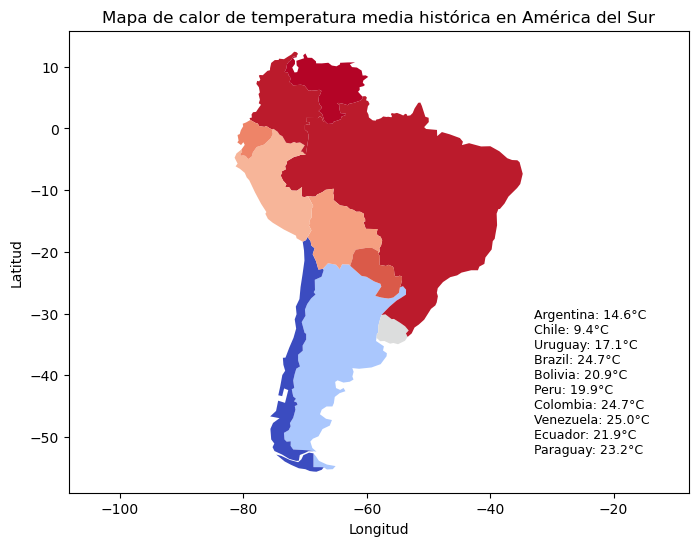

In [33]:
# Temperatura media histórica por país analizado (Gráfico)

temp_media = datos_f.groupby('Country')['AverageTemperature'].mean().reset_index()


temp_media.rename(columns={'AverageTemperature': 'MeanTemperature'}, inplace=True) # Renombramos las columnas para que coincidan con el shapefile

mapa_america = mapa_america.merge(temp_media, how='left', left_on='NAME', right_on='Country') # Unimos los dataset 'temp_media' con el shapefile

# Mapa
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
mapa_america.plot(
    column='MeanTemperature',  
    cmap='coolwarm',           
    missing_kwds={"color": "lightgrey"}, 
    ax=ax)

plt.title("Mapa de calor de temperatura media histórica en América del Sur")
plt.xlabel("Longitud")
plt.ylabel("Latitud")

# Lista de las temperaturas por país
temperaturas_pais = [f"{row['NAME']}: {row['MeanTemperature']:.1f}°C" for idx, row in mapa_america.iterrows()]

# Leyenda en el mapa
legend_text = "\n".join(temperaturas_pais)

plt.text(
    0.75, 0.4,  # Posición dentro del mapa (relativo al eje x (transform))
    legend_text,  
    fontsize=9,   
    ha='left',    
    va='top',
    transform=ax.transAxes,
    bbox={'facecolor': 'white', 'alpha': 0})

plt.axis('equal') 
plt.show()

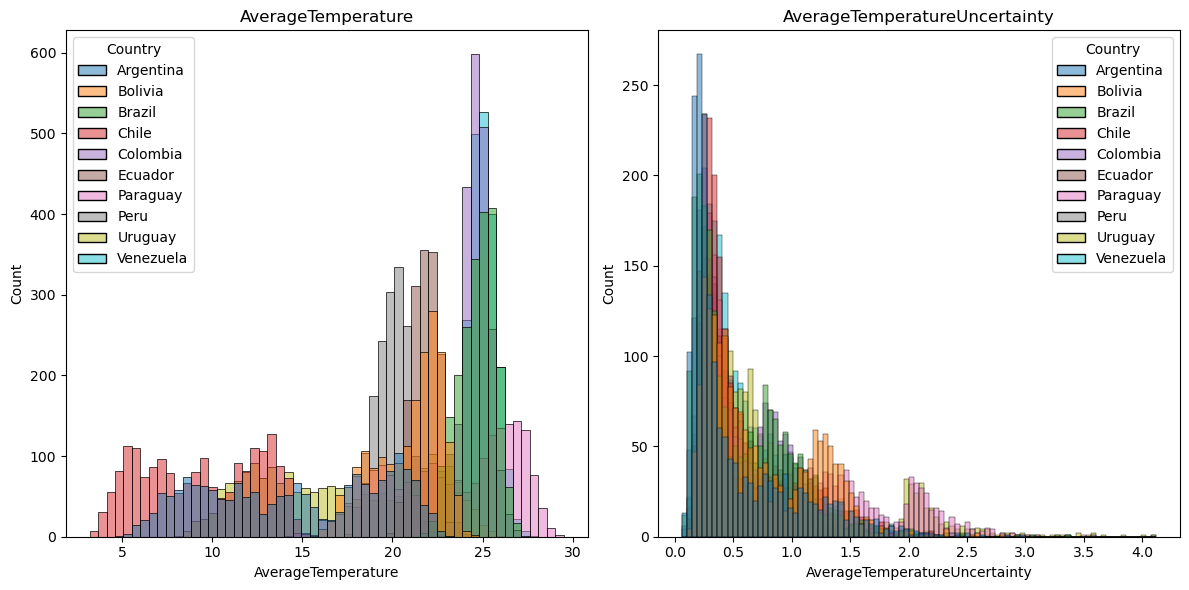

In [34]:
# Gráfico de temperaturas por país
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

cols = ['AverageTemperature', 'AverageTemperatureUncertainty']

for i, col in enumerate(cols):
    sns.histplot(data=datos_f, x=col, hue='Country', ax=axes[i])
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()    

<a name='6'></a>

## **6) Regularización del dataset**

###### <a name='6.1'></a>
###  **6.1) Datos duplicados**

In [37]:
duplicados  = datos_f.duplicated(keep=False) 
dDuplicados = datos_f[duplicados]
print(f'El dataset tiene: {len(dDuplicados)} datos duplicados.')

El dataset tiene: 0 datos duplicados.


<a name='6.2'></a>
###  **6.2) Datos faltantes**

In [39]:
# Revisamos cuantos datos faltantes hay en el dataset:
nFaltantes = datos_f.isna().sum()
nFaltantes

dt                                  0
AverageTemperature               1077
AverageTemperatureUncertainty    1077
Country                             0
dtype: int64

In [40]:
print(f'La cantidad de datos faltantes en el dataset es de: {nFaltantes.iloc[1]} ({(nFaltantes.iloc[1] / len(datos_f)) * 100:.2f}% del total de los datos)')

La cantidad de datos faltantes en el dataset es de: 1077 (5.26% del total de los datos)


In [41]:
# Dado que hay datos faltantes en la columna 'AverageTemperature' y 'AverageTemperatureUncertainty': Revisamos en qué fechas estan los datos faltantes:
col_analizar   = ['AverageTemperature', 'AverageTemperatureUncertainty'] # Columnas a analizar.
dFaltantes     = datos_f[datos_f[col_analizar].isna().any(axis=1)]       # Filas con faltantes.
dFaltantes_ord = dFaltantes['dt'].sort_values()                          # Ordenamos los datos faltantes por fecha.

print(f"Fechas con valores de temperatura faltantes entre: {dFaltantes_ord.head(1).values[0]} y {dFaltantes_ord.tail(1).values[0]}\n")

Fechas con valores de temperatura faltantes entre: 1824-06-01 y 2013-09-01



<p style="text-align: justify; line-height: 1.6;font-size:16px">
Conclusión: Existen datos faltantes entre 1824 y 2013. Estudiamos cuantos datos faltan para cada país.
</p>

In [43]:
# Convertimos la columna 'dt' a tipo datetime
datos_fc = datos_f.copy() 
datos_fc['dt'] = pd.to_datetime(datos_fc['dt'])

<Figure size 1000x400 with 0 Axes>

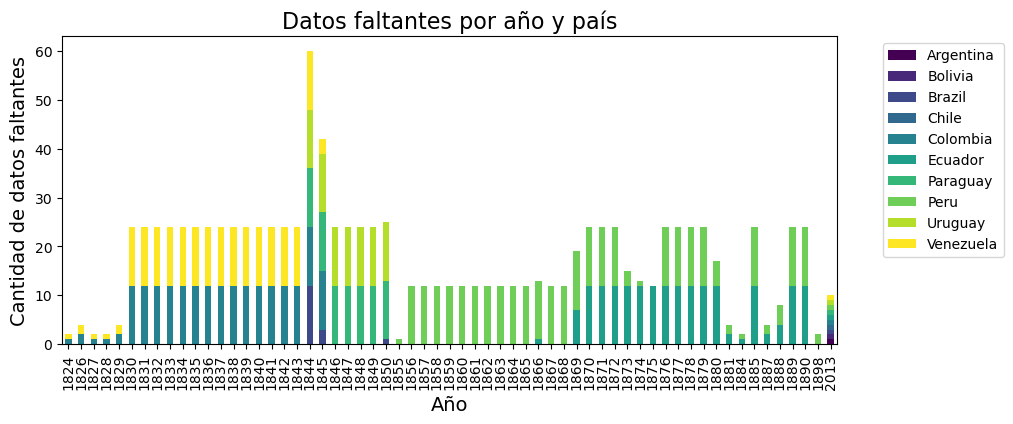

In [44]:
# Estudiamos los datos faltantes por año
dFaltantes = datos_fc[datos_fc[['AverageTemperature', 'AverageTemperatureUncertainty']].isna().any(axis=1)].copy()
dFaltantes['year'] = dFaltantes['dt'].dt.year
faltantes_por_anio = dFaltantes.groupby(['year','Country']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 4))
faltantes_por_anio.plot(kind='bar', stacked=True, figsize=(10, 4), colormap='viridis')

plt.title("Datos faltantes por año y país", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Cantidad de datos faltantes", fontsize=14)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<p style="text-align: justify; line-height: 1.6;font-size:16px">
Filtramos las fechas entre 2000-01-01 y 2010-01-01 para analizar solo 10 años.
</p>

In [46]:
# Obtenemos los datos de temperatura media en las fechas elegidas
datos_ff = datos_fc[(datos_fc['dt'] >= '2000-01-01') & (datos_fc['dt'] <= '2010-01-01')]

# Ordenamos los datos por país y fecha
datos_ff = datos_ff.sort_values(by=['Country', 'dt'])

datos_ff.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
27202,2000-01-01,22.092,0.177,Argentina
27203,2000-02-01,20.395,0.127,Argentina
27204,2000-03-01,17.929,0.266,Argentina
27205,2000-04-01,15.438,0.141,Argentina
27206,2000-05-01,10.858,0.234,Argentina


In [47]:
datos_ff.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

<a name='6.3'></a>
###  **6.3) Nuevas features (variables)**

In [49]:
# Tendencia (diferencia entre temperatura actual y anterior)
datos_ff['tendencia'] = datos_ff.groupby('Country')['AverageTemperature'].diff().fillna(0) 
datos_ff['mes'] = datos_ff['dt'].dt.month                # Mes
datos_ff['anio'] = datos_ff['dt'].dt.year                # Año
datos_ff['dia'] = datos_ff['dt'].dt.day                  # Día
datos_ff['dia_de_semana'] = datos_ff['dt'].dt.dayofweek  # Día de la semana


In [50]:
#Estaciones 
def obtener_estacion(mes):
    if mes in [12, 1, 2]:
        return 'Verano'
    elif mes in [3, 4, 5]:
        return 'Otoño'
    elif mes in [6, 7, 8]:
        return 'Invierno'
    elif mes in [9, 10, 11]:
        return 'Primavera'

def obtener_temperatura(estacion):
    if estacion in ['Invierno', 'Otoño']:
        return 'Fría'
    elif estacion in ['Primavera', 'Verano']:
        return 'Cálida'

# Aplicar las funciones al DataFrame
datos_ff['estacion'] = datos_ff['mes'].apply(obtener_estacion)
datos_ff['categoria_temperatura'] = datos_ff['estacion'].apply(obtener_temperatura)


In [51]:
# Calcular la media histórica (media de todos los años) para cada país
media_historica_estacion = datos_ff.groupby(['Country', 'estacion'])['AverageTemperature'].transform('mean')
media_historica = datos_ff.groupby('Country')['AverageTemperature'].transform('mean')

# Calcular la tasa de cambio en relación con la media histórica por estacion
datos_ff['tendencia_media_estacion'] = datos_ff['AverageTemperature'] - media_historica_estacion
datos_ff['tasa_cambio_estacion'] = ((datos_ff['AverageTemperature'] - media_historica_estacion) / media_historica_estacion) * 100

# Calcular la tasa de cambio en relación con la media histórica
datos_ff['tendencia_media'] = datos_ff['AverageTemperature'] - media_historica
datos_ff['tasa_cambio'] = ((datos_ff['AverageTemperature'] - media_historica) / media_historica) * 100

datos_ff.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,tendencia,mes,anio,dia,dia_de_semana,estacion,categoria_temperatura,tendencia_media_estacion,tasa_cambio_estacion,tendencia_media,tasa_cambio
27202,2000-01-01,22.092,0.177,Argentina,0.000,1,2000,1,5,Verano,Cálida,0.744548,3.487762,6.775033,44.232210
27203,2000-02-01,20.395,0.127,Argentina,-1.697,2,2000,1,1,Verano,Cálida,-0.952452,-4.461664,5.078033,33.152994
27204,2000-03-01,17.929,0.266,Argentina,-2.466,3,2000,1,2,Otoño,Fría,2.974167,19.887662,2.612033,17.053200
27205,2000-04-01,15.438,0.141,Argentina,-2.491,4,2000,1,5,Otoño,Fría,0.483167,3.230840,0.121033,0.790189
27206,2000-05-01,10.858,0.234,Argentina,-4.580,5,2000,1,0,Otoño,Fría,-4.096833,-27.394711,-4.458967,-29.111292


In [52]:
datos_ff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1210 entries, 27202 to 564571
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             1210 non-null   datetime64[ns]
 1   AverageTemperature             1210 non-null   float64       
 2   AverageTemperatureUncertainty  1210 non-null   float64       
 3   Country                        1210 non-null   object        
 4   tendencia                      1210 non-null   float64       
 5   mes                            1210 non-null   int64         
 6   anio                           1210 non-null   int64         
 7   dia                            1210 non-null   int64         
 8   dia_de_semana                  1210 non-null   int64         
 9   estacion                       1210 non-null   object        
 10  categoria_temperatura          1210 non-null   object        
 11  tendencia_m

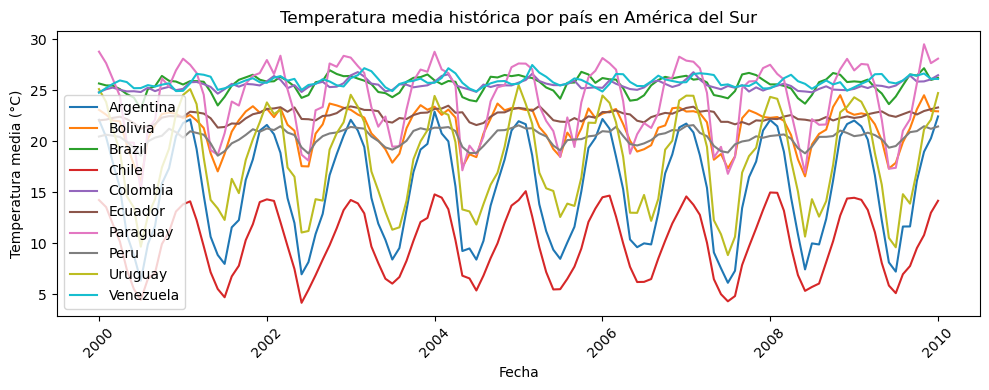

In [53]:
# Variación de la temperatura media para cada país (serie de tiempo)
plt.figure(figsize=(10, 4))

for pais in paises_america_sur:
    data_pais = datos_ff[datos_ff['Country'] == pais]
    plt.plot(data_pais['dt'], data_pais['AverageTemperature'], label=pais)

plt.title("Temperatura media histórica por país en América del Sur")
plt.xlabel("Fecha")
plt.ylabel("Temperatura media (°C)")

plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

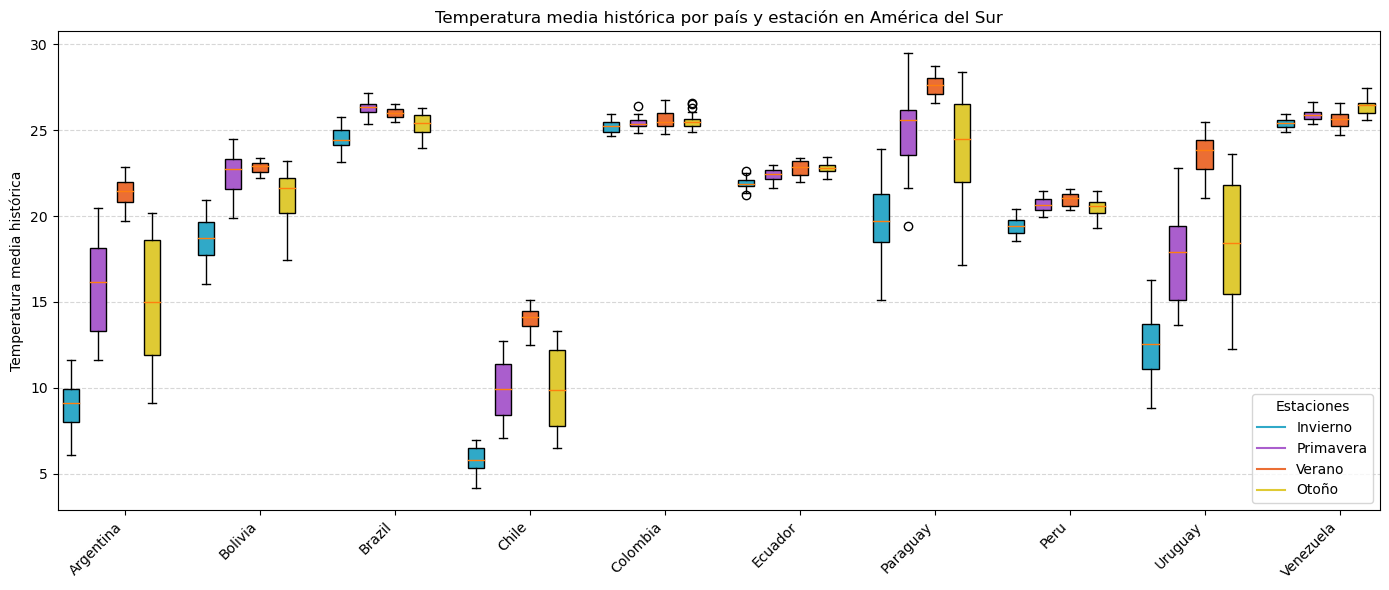

In [54]:
# Variación de la temperatura media por estación por país
# Colores para las estaciones
colores = {
    'Invierno': '#30a9c8',
    'Primavera': '#aa5ecd',
    'Verano': '#eb6e34',
    'Otoño': '#dfca34'
}

# Crear los datos para el boxplot
boxplot_data = []
positions = []
colors = []
xticks = []

pos = 1  # Posición inicial en el eje X
for pais in paises_america_sur:
    for estacion in ['Invierno', 'Primavera', 'Verano', 'Otoño']:
        # Filtrar los datos por país y estación
        datos_pais_estacion = datos_ff[
            (datos_ff['Country'] == pais) & 
            (datos_ff['estacion'] == estacion)
        ]
        tendencia_pais = datos_pais_estacion['AverageTemperature']
        boxplot_data.append(tendencia_pais)
        positions.append(pos)
        colors.append(colores[estacion])
        pos += 1
    # Añadir un espacio después de cada país para separar los boxplots
    xticks.append(pos - 2)  # Posición central del país en el eje X
    pos += 1

# Crear el gráfico
plt.figure(figsize=(14, 6))

# Crear boxplots con colores
bplot = plt.boxplot(boxplot_data, positions=positions, patch_artist=True, widths=0.6)

# Aplicar colores a los boxplots
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Personalizar el eje X
plt.xticks(xticks, paises_america_sur, rotation=45, ha='right')

# Añadir leyenda para las estaciones
for estacion, color in colores.items():
    plt.plot([], [], color=color, label=estacion)

# Colocar la leyenda abajo a la derecha
plt.legend(title="Estaciones", loc='lower right', bbox_to_anchor=(1, 0))

plt.ylabel("Temperatura media histórica")
plt.title("Temperatura media histórica por país y estación en América del Sur")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

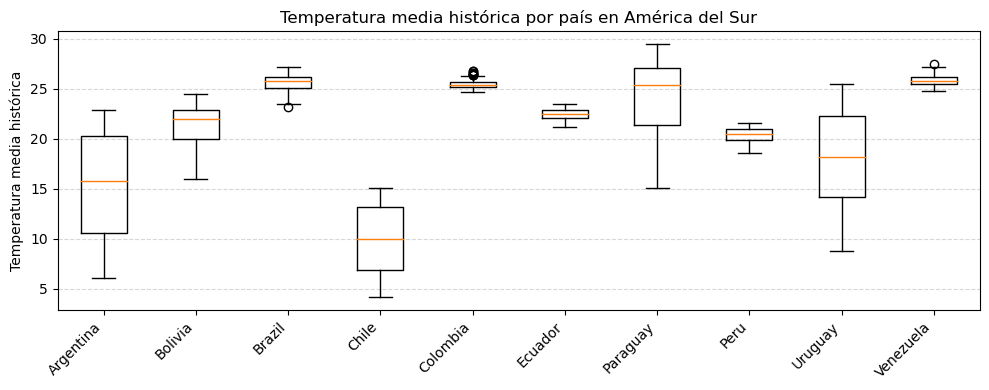

In [55]:
# Variación de la temperatura media para cada país (boxplot)
boxplot_data = []

for pais in paises_america_sur:
    datos_pais = datos_ff[datos_ff['Country'] == pais]
    tendencia_pais = datos_pais['AverageTemperature']
    boxplot_data.append(tendencia_pais)

plt.figure(figsize=(10, 4))
plt.boxplot(boxplot_data)

plt.xticks(range(1, len(paises_america_sur) + 1), paises_america_sur, rotation=45, ha='right')  
plt.ylabel("Temperatura media histórica")
plt.title("Temperatura media histórica por país en América del Sur")
plt.grid(axis='y', linestyle='--', alpha=0.5) 

plt.tight_layout()
plt.show()

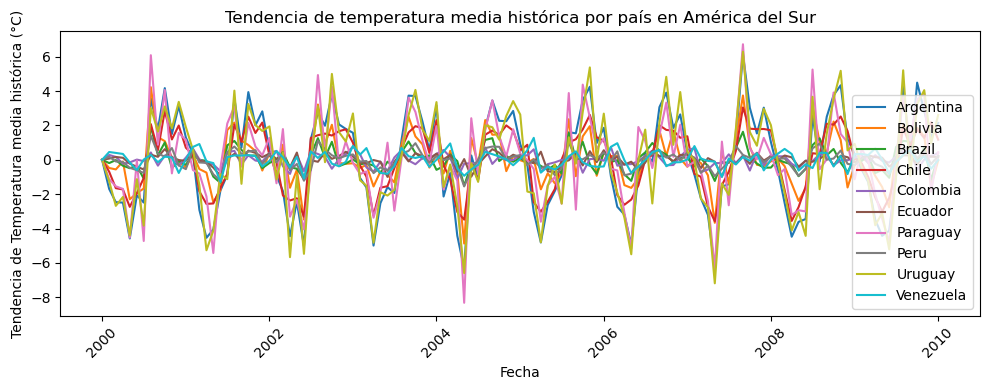

In [56]:
# Variación de la tendencia de la temperatura media histórica para cada país (serie de tiempo)
plt.figure(figsize=(10, 4))

for pais in paises_america_sur:
    data_pais = datos_ff[datos_ff['Country'] == pais]
    plt.plot(data_pais['dt'], data_pais['tendencia'], label=pais)

plt.title("Tendencia de temperatura media histórica por país en América del Sur")
plt.xlabel("Fecha")
plt.ylabel("Tendencia de Temperatura media histórica (°C)")

plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

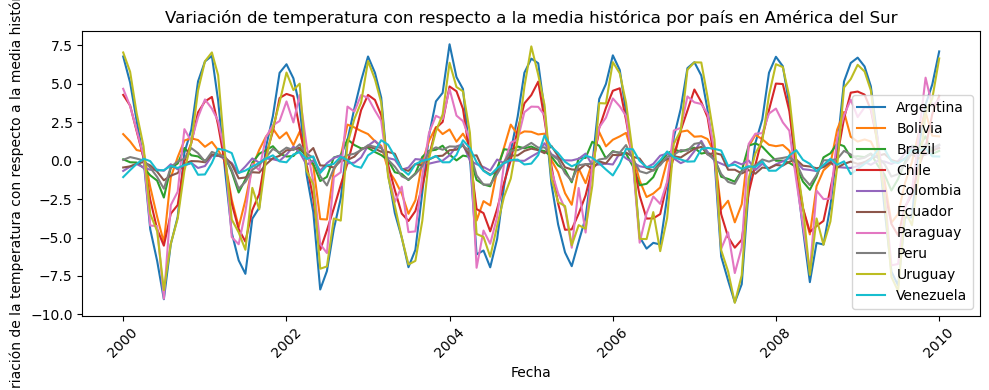

In [57]:
# Variación de la tendencia de la temperatura con respecto a la media histórica para cada país (serie de tiempo)
plt.figure(figsize=(10, 4))

for pais in paises_america_sur:
    data_pais = datos_ff[datos_ff['Country'] == pais]
    plt.plot(data_pais['dt'], data_pais['tendencia_media'], label=pais)

plt.title("Variación de temperatura con respecto a la media histórica por país en América del Sur")
plt.xlabel("Fecha")
plt.ylabel("Variación de la temperatura con respecto a la media histórica (°C)")

plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

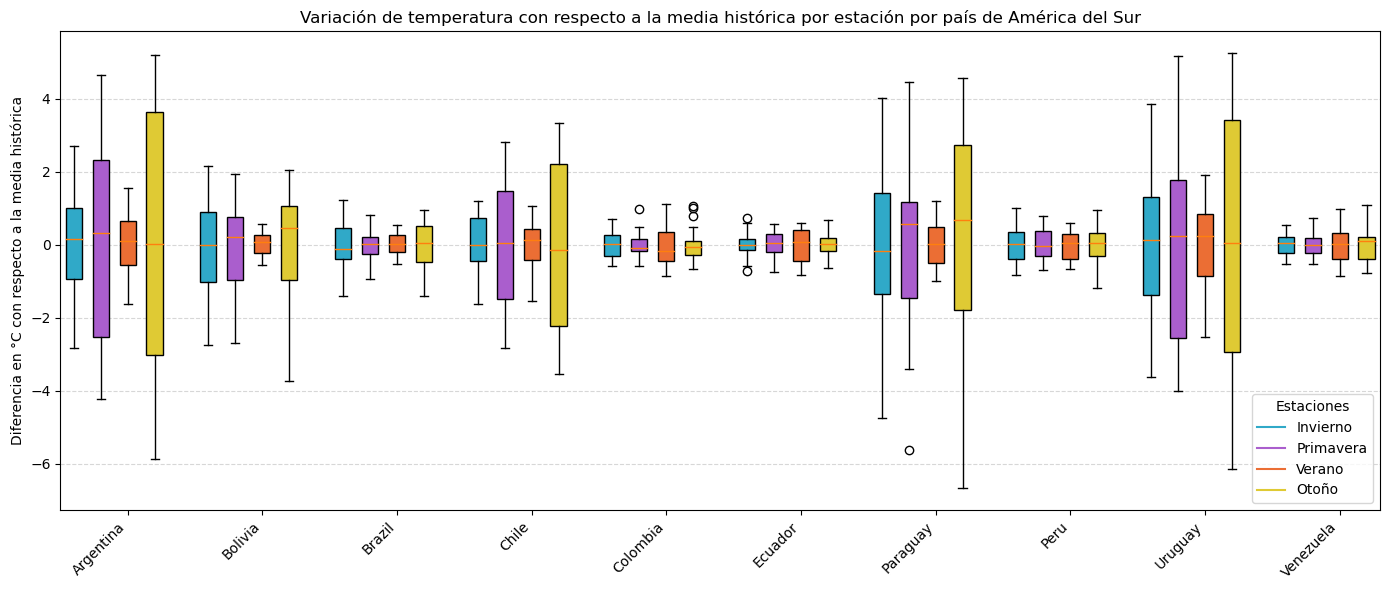

In [58]:
# Crear los datos para el boxplot
boxplot_data = []
positions = []
colors = []
xticks = []

pos = 1  # Posición inicial en el eje X
for pais in paises_america_sur:
    for estacion in ['Invierno', 'Primavera', 'Verano', 'Otoño']:
        # Filtrar los datos por país y estación
        datos_pais_estacion = datos_ff[
            (datos_ff['Country'] == pais) & 
            (datos_ff['estacion'] == estacion)
        ]
        tendencia_pais = datos_pais_estacion['tendencia_media_estacion'] 
        boxplot_data.append(tendencia_pais)
        positions.append(pos)
        colors.append(colores[estacion])
        pos += 1
    # Añadir un espacio después de cada país para separar los boxplots
    xticks.append(pos - 2)  # Posición central del país en el eje X
    pos += 1

# Crear el gráfico
plt.figure(figsize=(14, 6))

# Crear boxplots con colores
bplot = plt.boxplot(boxplot_data, positions=positions, patch_artist=True, widths=0.6)

# Aplicar colores a los boxplots
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Personalizar el eje X
plt.xticks(xticks, paises_america_sur, rotation=45, ha='right')

# Añadir leyenda para las estaciones
for estacion, color in colores.items():
    plt.plot([], [], color=color, label=estacion)

# Colocar la leyenda abajo a la derecha
plt.legend(title="Estaciones", loc='lower right', bbox_to_anchor=(1, 0))

plt.ylabel("Diferencia en °C con respecto a la media histórica")
plt.title("Variación de temperatura con respecto a la media histórica por estación por país de América del Sur")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [59]:
#Temperaturas medias por pais y estacion
medias = datos_ff.groupby(['Country', 'estacion'])['AverageTemperature'].mean()
pivot_medias = medias.unstack(level=1)
pivot_medias

estacion,Invierno,Otoño,Primavera,Verano
Country,,,,
Argentina,8.931900,14.954833,15.832667,21.347452
Bolivia,18.770300,21.179067,22.561067,22.809000
Brazil,24.563167,25.374267,26.327567,25.990452
Chile,5.762567,9.989533,9.882600,14.018871
Colombia,25.227033,25.546233,25.438833,25.668742
Ecuador,21.920800,22.798500,22.384933,22.806548
Paraguay,19.861700,23.799633,25.034433,27.589613
Peru,19.403433,20.506067,20.663267,20.984290
Uruguay,12.435333,18.383667,17.653467,23.601871


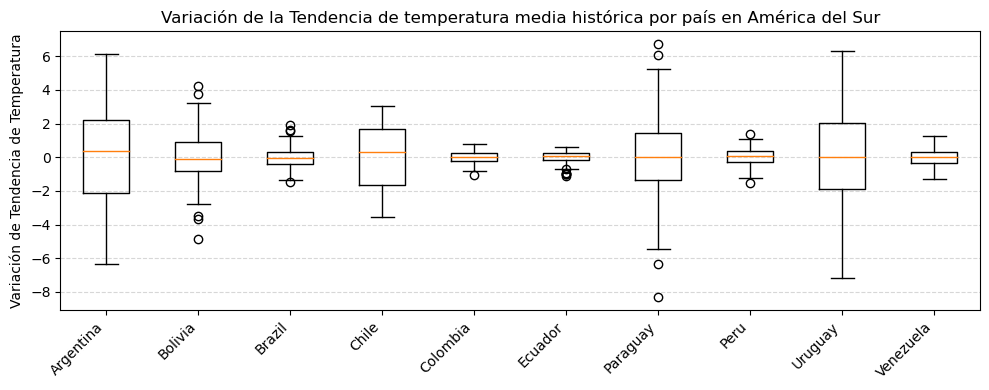

In [60]:
# Variación de la tendencia de la temperatura media histórica para cada país (boxplot)
boxplot_data = []

for pais in paises_america_sur:
    datos_pais = datos_ff[datos_ff['Country'] == pais]
    tendencia_pais = datos_pais['tendencia']
    boxplot_data.append(tendencia_pais)

plt.figure(figsize=(10, 4))
plt.boxplot(boxplot_data)

plt.xticks(range(1, len(paises_america_sur) + 1), paises_america_sur, rotation=45, ha='right')  
plt.ylabel("Variación de Tendencia de Temperatura")
plt.title("Variación de la Tendencia de temperatura media histórica por país en América del Sur")
plt.grid(axis='y', linestyle='--', alpha=0.5) 

plt.tight_layout()
plt.show()



<p style="text-align: justify; line-height: 1.6;font-size:16px">
Conclusión: Se ven tendencias similares (medianas) pero temperaturas muy distintas.
</p>

<a name='7'></a>

## **7) Modelos**

<p style="text-align: justify; line-height: 1.6;font-size:16px">
Objetivo: predecir la temperatura media.
</p>

In [64]:
# Variables a considerar en el análisis
features = ['tendencia', 'mes', 'anio', 'dia', 'dia_de_semana', 'estacion']
target = 'AverageTemperature'

In [65]:
le = LabelEncoder()

# Ajustar el encoder a la columna categórica
datos_ff.loc[:, 'estacion'] = le.fit_transform(datos_ff['estacion'])

/var/folders/c_/j32xwqnj1x7csctpdv6jhss80000gn/T/ipykernel_8574/3846115348.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  datos_ff.loc[:, 'estacion'] = le.fit_transform(datos_ff['estacion'])


<a name='7.1'></a>

### **7.1) Modelo Random Forest Regressor (para cada país) sin tuneo de hiperparámetros**
<p style="text-align: justify; line-height: 1.6;font-size:16px">
El modelo Random Forest no requiere de normalización de los datos.
</p>

In [67]:
# Definimos las listas donde se guardan los resultados obtenidos (errores) para realizar una tabla final comparativa.
names = []; mses = []; maes = []; rmse = [];

# MSE (Mean Squared Error)
# MAE (Mean Absolute Error)
# RMSE (Root Mean Squared Error)

Entrenando modelo para Argentina...


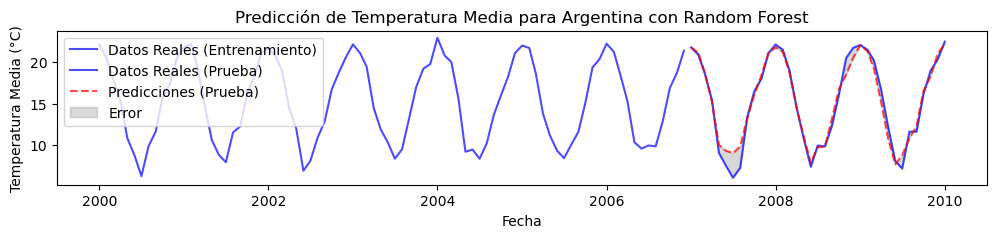

Entrenando modelo para Bolivia...


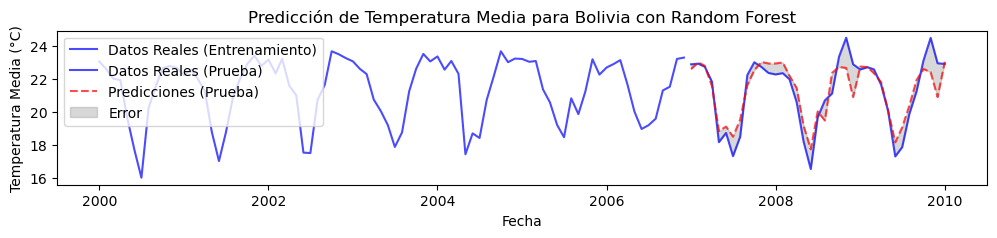

Entrenando modelo para Brazil...


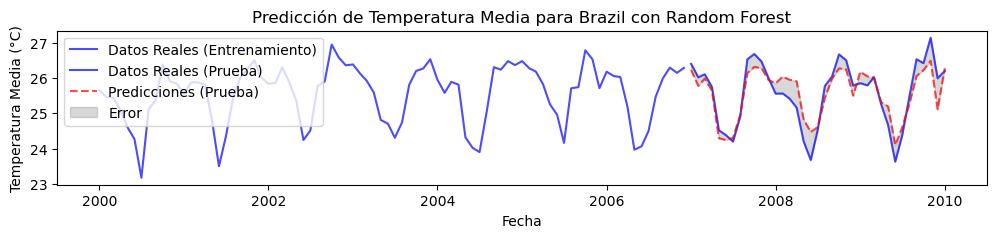

Entrenando modelo para Chile...


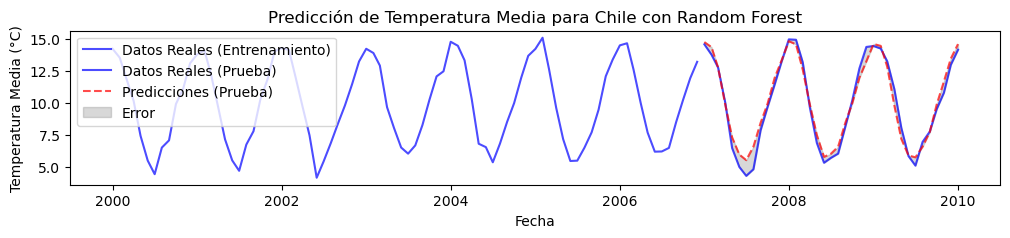

Entrenando modelo para Colombia...


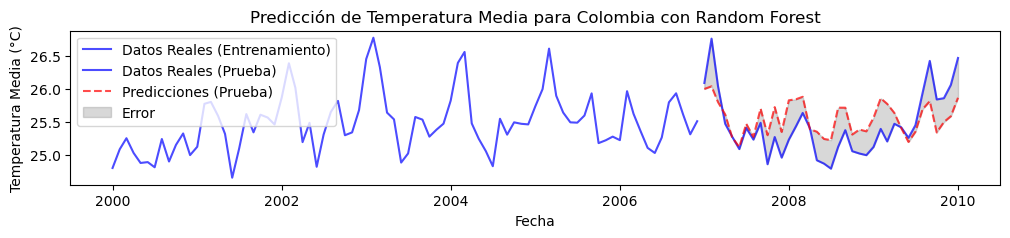

Entrenando modelo para Ecuador...


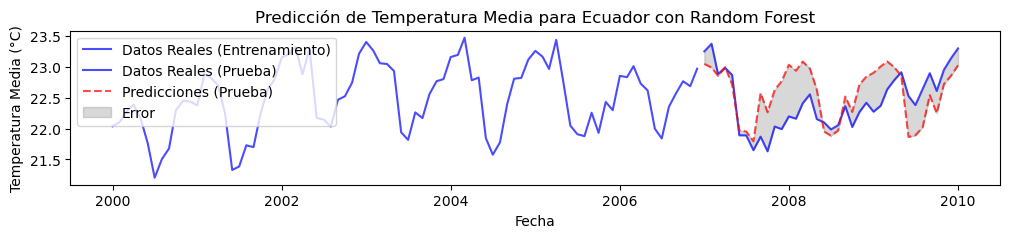

Entrenando modelo para Paraguay...


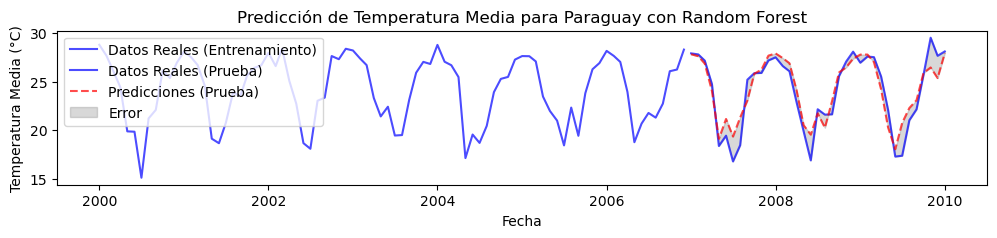

Entrenando modelo para Peru...


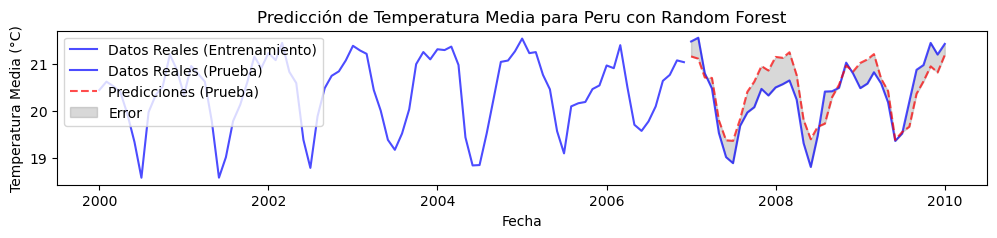

Entrenando modelo para Uruguay...


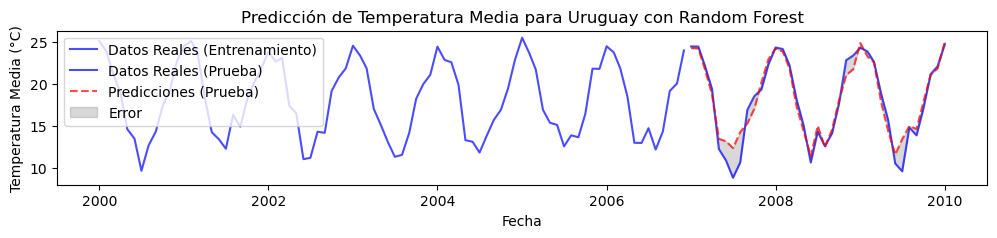

Entrenando modelo para Venezuela...


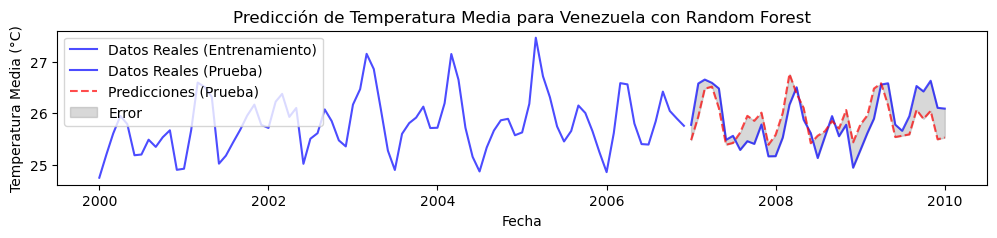

In [68]:
for pais in paises_america_sur:
    print(f"Entrenando modelo para {pais}...")
    
    # Filtrado del país a analizar en el ciclo
    pais_data = datos_ff[datos_ff['Country'] == pais]
    
    # División en train-test set (70% - 30%)
    train_size = int(len(pais_data) * 0.7)
    train_data = pais_data[:train_size]
    test_data = pais_data[train_size:]
    
    # Features y target
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]
    
    # Modelo Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = rf_model.predict(X_test)
    
    # Cálculo de errores
    names.append(pais)
    mses.append(mean_squared_error(y_test, y_pred))
    maes.append(mean_absolute_error(y_test, y_pred))
    rmse.append(mean_squared_error(y_test, y_pred) ** 0.5)
    
    # Gráfico
    plt.figure(figsize=(12, 2))    
    plt.plot(pais_data['dt'][:train_size], pais_data['AverageTemperature'][:train_size], label='Datos Reales (Entrenamiento)', color='blue', alpha=0.7)    
    plt.plot(test_data['dt'], y_test, label='Datos Reales (Prueba)', color='blue', alpha=0.7)
    plt.plot(test_data['dt'], y_pred, label='Predicciones (Prueba)', color='red', linestyle='--', alpha=0.7)    
    plt.fill_between(test_data['dt'], y_test, y_pred, color='gray', alpha=0.3, label='Error')    
    plt.title(f'Predicción de Temperatura Media para {pais} con Random Forest')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura Media (°C)')
    plt.legend(loc='upper left')    
    plt.show()

In [69]:
results_dict = {'País': names, 'MSE': mses, 'MAE': maes, 'RMS': rmse}
pd_models_performance = pd.DataFrame(results_dict).sort_values(by='MSE', ascending=1)
pd_models_performance.style.background_gradient(cmap='coolwarm')

,País,MSE,MAE,RMS
4,Colombia,0.142120,0.319976,0.376988
9,Venezuela,0.145514,0.336320,0.381463
2,Brazil,0.145911,0.309188,0.381983
7,Peru,0.169329,0.360541,0.411496
5,Ecuador,0.198876,0.374142,0.445955
3,Chile,0.415293,0.513733,0.644432
1,Bolivia,0.834147,0.711211,0.913316
0,Argentina,0.998784,0.694306,0.999392
8,Uruguay,1.844752,0.964642,1.358217
6,Paraguay,2.000091,1.088160,1.414246


<a name='7.2'></a>

### **7.2) Modelo Random Forest Regressor (para cada país) con tuneo de hiperparámetros**

In [71]:
# Definimos las listas donde se guardan los resultados obtenidos (errores) para realizar una tabla final comparativa.
names = []; mses = []; maes = []; rmse = [];

In [72]:
n_estimators = [50, 100, 150]                    # Número de árboles en un bosque aleatorio
max_features = ['sqrt', 'log2']                  # Número de características a considerar al buscar la mejor división
max_depth = [4, 5]                               # Profundidad del árbol
min_samples_split = [2, 4, 6]                    # Número mínimo de muestras requeridas para dividir un nodo
min_samples_leaf = [1, 2, 3]                     # Número mínimo de muestras requeridas en cada nodo hoja

Entrenando modelo para Argentina...


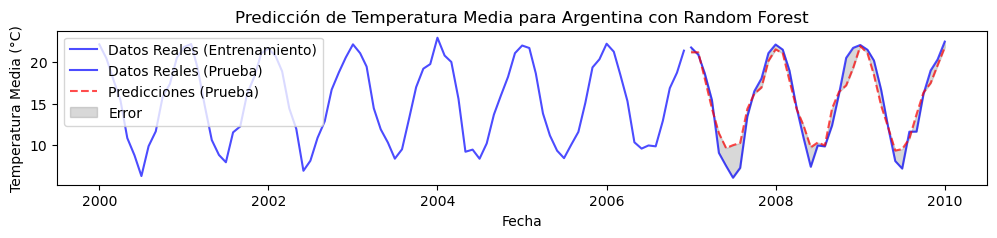

Entrenando modelo para Bolivia...


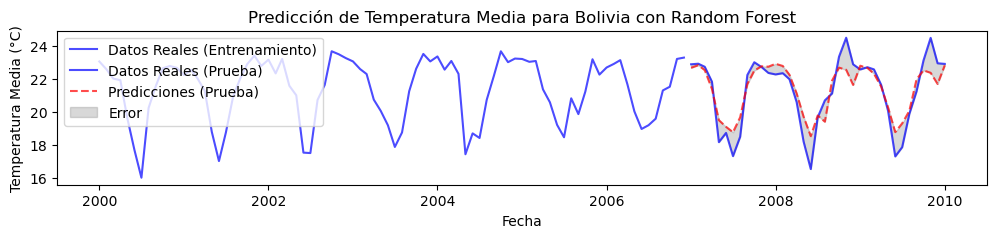

Entrenando modelo para Brazil...


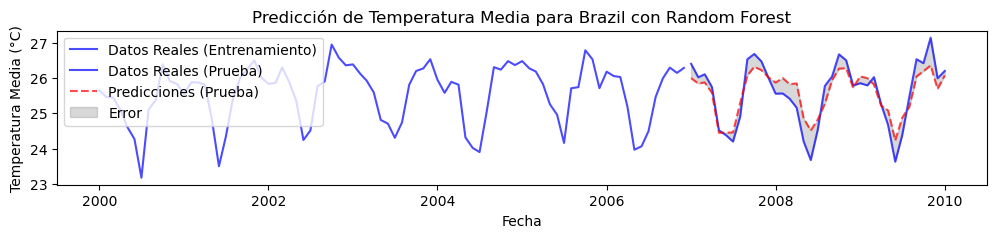

Entrenando modelo para Chile...


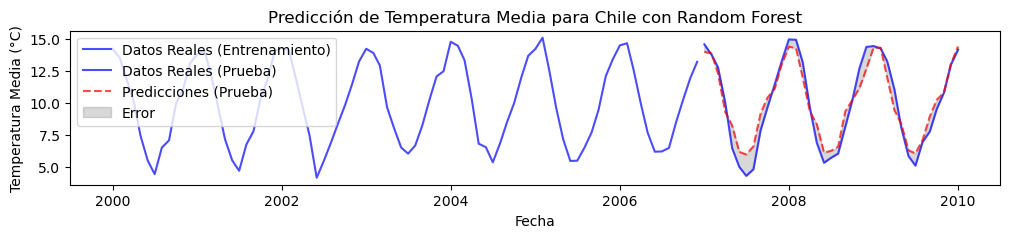

Entrenando modelo para Colombia...


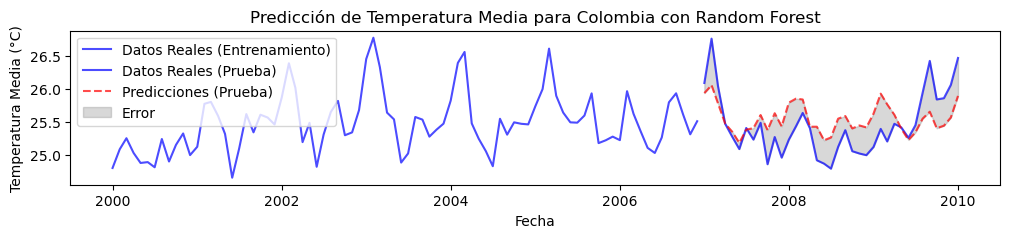

Entrenando modelo para Ecuador...


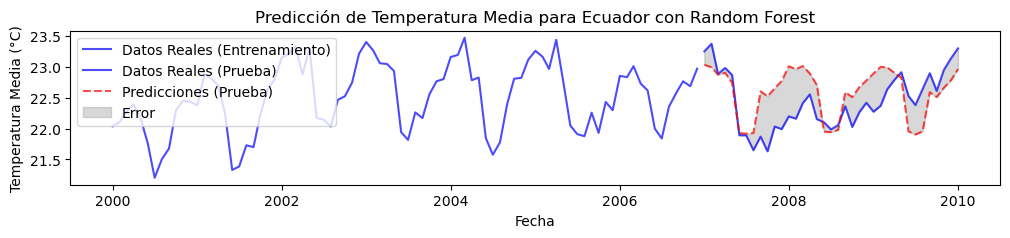

Entrenando modelo para Paraguay...


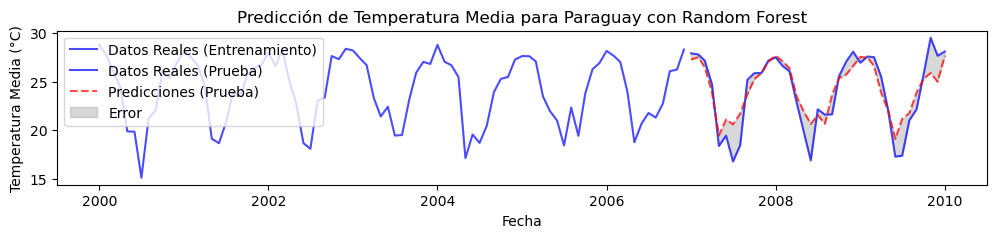

Entrenando modelo para Peru...


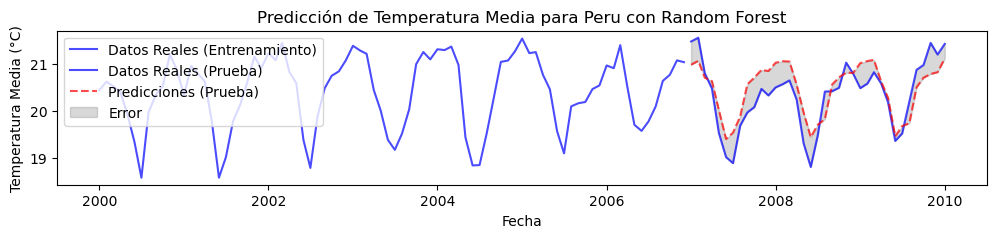

Entrenando modelo para Uruguay...


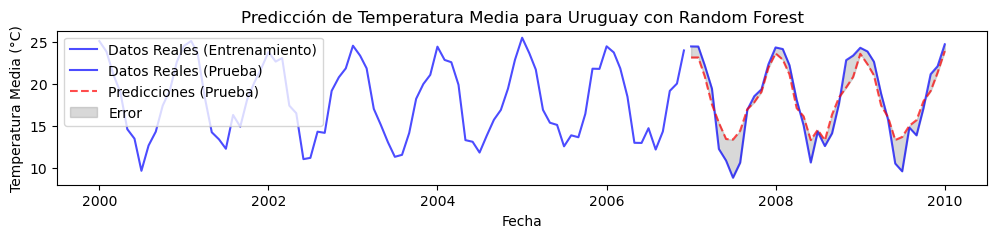

Entrenando modelo para Venezuela...


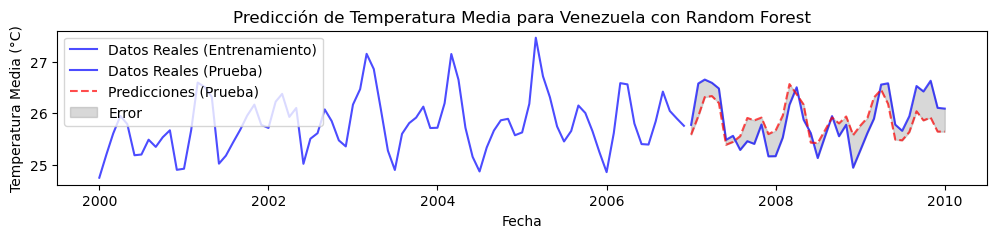

In [73]:
for pais in paises_america_sur:
    print(f"Entrenando modelo para {pais}...")
    
    # Filtrado del país a analizar en el ciclo
    pais_data = datos_ff[datos_ff['Country'] == pais]
    
    # División en train-test set (70% - 30%)
    train_size = int(len(pais_data) * 0.7)
    train_data = pais_data[:train_size]
    test_data = pais_data[train_size:]
    
    # Features y target
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    # Grilla de parámetros    
    param_grid_RF = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "max_depth": max_depth
    }

    # Modelo Random Forest Regressor
    model_search_RF = GridSearchCV(estimator=RandomForestRegressor(), 
                                   param_grid=param_grid_RF, 
                                   scoring='neg_mean_squared_error',
                                   cv=5, 
                                   n_jobs=-1)

    model_search_RF.fit(X_train, y_train)

    rf_model = model_search_RF.best_estimator_

    # Predicciones
    y_pred = rf_model.predict(X_test)
    
    # Cálculo de errores
    names.append(pais)
    mses.append(mean_squared_error(y_test, y_pred))
    maes.append(mean_absolute_error(y_test, y_pred))
    rmse.append(mean_squared_error(y_test, y_pred) ** 0.5)
    
    # Gráfico
    plt.figure(figsize=(12, 2))    
    plt.plot(pais_data['dt'][:train_size], pais_data['AverageTemperature'][:train_size], label='Datos Reales (Entrenamiento)', color='blue', alpha=0.7)    
    plt.plot(test_data['dt'], y_test, label='Datos Reales (Prueba)', color='blue', alpha=0.7)
    plt.plot(test_data['dt'], y_pred, label='Predicciones (Prueba)', color='red', linestyle='--', alpha=0.7)    
    plt.fill_between(test_data['dt'], y_test, y_pred, color='gray', alpha=0.3, label='Error')    
    plt.title(f'Predicción de Temperatura Media para {pais} con Random Forest')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura Media (°C)')
    plt.legend(loc='upper left')    
    plt.show()

In [74]:
results_dict = {'País': names, 'MSE': mses, 'MAE': maes, 'RMS': rmse}
pd_models_performance = pd.DataFrame(results_dict).sort_values(by='MSE', ascending=1)
pd_models_performance.style.background_gradient(cmap='coolwarm')

,País,MSE,MAE,RMS
9,Venezuela,0.136637,0.329768,0.369644
2,Brazil,0.150247,0.328944,0.387617
4,Colombia,0.152993,0.332064,0.391143
7,Peru,0.175011,0.371379,0.418343
5,Ecuador,0.208436,0.377901,0.456548
1,Bolivia,0.894912,0.727619,0.945998
3,Chile,0.915054,0.772775,0.956585
0,Argentina,2.488688,1.233910,1.577557
6,Paraguay,2.888571,1.265422,1.699580
8,Uruguay,3.732331,1.559989,1.931924


<a name='7.3'></a>

### **7.3) Comparación de modelos en Argentina**

<p style="text-align: justify; line-height: 1.6;font-size:16px">
Dado que se van a comparar modelos que utilizan distancias lineales o realizan una transformación del dominio de los datos, se normalizan los mismos a media 0 varianza unitaria.
</p>

In [77]:
# Definimos las listas donde se guardan los resultados obtenidos (errores) para realizar una tabla final comparativa.
mses = []; maes = []; rmse = []; times = []; algoritmos_usados = []

In [78]:
# Obtemos los datos para los set de test y train. Utilizamos solo los datos de Argentina en este apartado.
ArgData = datos_ff[datos_ff['Country'] == 'Argentina']

# División en train-test set (70% - 30%)
train_size = int(len(ArgData) * 0.7)
train_data = ArgData[:train_size]
test_data  = ArgData[train_size:]
    
# Armamos los set de datos.
X_train = train_data[features]
y_train = train_data[target]
X_test  = test_data[features]
y_test  = test_data[target]

# Normalización de los datos
scaler    = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

In [79]:
# Función que entrena el modelo.
def hacer_modelo(algoritmo, X_train, y_train):
    model = algoritmo
    model.fit(X_train, y_train)
    return model

In [80]:
# Algoritmos de regresión a analizar.
algoritmos = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), 
              BaggingRegressor(), SVR(), DecisionTreeRegressor(), ExtraTreeRegressor(), 
              LinearRegression(), KNeighborsRegressor()]

# Definición, entrenamiento y predicción de la lista de algoritmos analizados para un mismo set de datos.
for algoritmo in algoritmos:

    # Algoritmo a utilizar.
    name = type(algoritmo).__name__
    algoritmos_usados.append(name)
    
    print("Procesando: ", name)

    # Definición, entrenamiento y predicción del modelo analizado en el ciclo de iteración.
    start_time = time.time()
    model = hacer_modelo(algoritmo, X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    end_time = time.time()
    times.append(end_time - start_time)
    
    # Cálculo de diferentes errores.
    mses.append(mean_squared_error(y_test, y_pred))
    maes.append(mean_absolute_error(y_test, y_pred))
    rmse.append(mean_squared_error(y_test, y_pred) ** 0.5)

Procesando:  RandomForestRegressor
Procesando:  AdaBoostRegressor
Procesando:  GradientBoostingRegressor
Procesando:  BaggingRegressor
Procesando:  SVR
Procesando:  DecisionTreeRegressor
Procesando:  ExtraTreeRegressor
Procesando:  LinearRegression
Procesando:  KNeighborsRegressor


In [81]:
# Diccionari para tabla final de resultados.
results_dict = {'Algoritmo': algoritmos_usados, 'MSE': mses, 'MAE': maes, 'RMS': rmse, 'Time': times}
pd_models_performance = pd.DataFrame(results_dict).sort_values(by='MSE', ascending=1)
pd_models_performance.style.background_gradient(cmap='coolwarm')

,Algoritmo,MSE,MAE,RMS,Time
2,GradientBoostingRegressor,0.942865,0.656921,0.971013,0.038886
0,RandomForestRegressor,0.987630,0.684772,0.993796,0.150485
3,BaggingRegressor,1.070950,0.701789,1.034867,0.015879
1,AdaBoostRegressor,1.136193,0.797062,1.065924,0.066112
6,ExtraTreeRegressor,1.146362,0.780270,1.070683,0.001030
5,DecisionTreeRegressor,1.263685,0.772622,1.124137,0.000680
7,LinearRegression,7.096056,2.208442,2.663842,0.008320
8,KNeighborsRegressor,8.932137,2.304330,2.988668,0.004763
4,SVR,13.933949,3.290041,3.732821,0.003997


<a name='7.4'></a>

### **7.4) Estimación de temperatura durante el período de cultivo de Soja en Argentina**

<p style="text-align: justify; line-height: 1.6;font-size:16px">
La temperatura y el fotoperíodo son los factores ambientales que regulan el desarrollo de la Soja, actuando en forma simultánea en las plantas. El período de este cultivo suele extenderse desde diciembre hasta los primeros meses de otoño. Temperaturas extremas durante este rango de tiempo, especialmente durante el período crítico, pueden llevar al aborto de casi la totalidad de las vainas de las plantas. En este sentido poder predecir las temperaturas durante el período del cultivo de las Soja puede servir como herramienta para implementar manejos preventivos para evitar pérdidas mayores en los rendimientos.</p>

In [84]:
# Obtenemos datos para los meses de cultivo de Soja en Argentina
DataSoja = datos_ff[(datos_ff['Country'] == 'Argentina') & (datos_ff['estacion'].isin([1, 3]))]

In [85]:
# Definimos las features
features = ['mes', 'anio', 'dia', 'dia_de_semana', 'estacion']
target = 'AverageTemperature'

In [86]:
# Definimos las listas donde se guardan los resultados obtenidos (errores) para realizar una tabla final comparativa.
mses = []; maes = []; rmse = []; times = []; algoritmos_usados = []

In [87]:
# División en train-test set (70% - 30%)
train_size = int(len(DataSoja) * 0.7)
train_data = DataSoja[:train_size]
test_data  = DataSoja[train_size:]
    
# Armamos los set de datos.
X_train = train_data[features]
y_train = train_data[target]
X_test  = test_data[features]
y_test  = test_data[target]

# Normalización de los datos
scaler    = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

In [88]:
# Algoritmos de regresión a analizar.
algoritmos = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), 
              BaggingRegressor(), SVR(), DecisionTreeRegressor(), ExtraTreeRegressor(), 
              LinearRegression(), KNeighborsRegressor()]

# Definición, entrenamiento y predicción de la lista de algoritmos analizados para un mismo set de datos.
for algoritmo in algoritmos:

    # Algoritmo a utilizar.
    name = type(algoritmo).__name__
    algoritmos_usados.append(name)
    
    print("Procesando: ", name)

    # Definición, entrenamiento y predicción del modelo analizado en el ciclo de iteración.
    start_time = time.time()
    model = hacer_modelo(algoritmo, X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    end_time = time.time()
    times.append(end_time - start_time)
    
    # Cálculo de diferentes errores.
    mses.append(mean_squared_error(y_test, y_pred))
    maes.append(mean_absolute_error(y_test, y_pred))
    rmse.append(mean_squared_error(y_test, y_pred) ** 0.5)

Procesando:  RandomForestRegressor
Procesando:  AdaBoostRegressor
Procesando:  GradientBoostingRegressor
Procesando:  BaggingRegressor
Procesando:  SVR
Procesando:  DecisionTreeRegressor
Procesando:  ExtraTreeRegressor
Procesando:  LinearRegression
Procesando:  KNeighborsRegressor


In [89]:
# Diccionari para tabla final de resultados.
results_dict = {'Algoritmo': algoritmos_usados, 'MSE': mses, 'MAE': maes, 'RMS': rmse, 'Time': times}
pd_models_performance = pd.DataFrame(results_dict).sort_values(by='MSE', ascending=1)
pd_models_performance.style.background_gradient(cmap='coolwarm')

,Algoritmo,MSE,MAE,RMS,Time
2,GradientBoostingRegressor,0.580489,0.580734,0.761898,0.026049
6,ExtraTreeRegressor,0.622721,0.658000,0.789127,0.000400
0,RandomForestRegressor,0.691448,0.580486,0.831534,0.091133
3,BaggingRegressor,0.820881,0.651489,0.906025,0.011220
1,AdaBoostRegressor,0.834368,0.640744,0.913438,0.025821
5,DecisionTreeRegressor,1.206183,0.842737,1.098264,0.000413
7,LinearRegression,5.930292,1.728738,2.435219,0.000728
8,KNeighborsRegressor,8.303666,2.178789,2.881608,0.000611
4,SVR,13.067980,2.534833,3.614966,0.000649


In [90]:
# Definir los hiperparámetros a probar con valores conservadores para evitar overfitting
param_grid_RF = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]  # Reducción de profundidad para evitar sobreajuste
}

# Inicializar el modelo de GridSearchCV
model_RF_Ar = GridSearchCV(
    estimator=GradientBoostingRegressor(), 
    param_grid=param_grid_RF, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_jobs=-1 
)

# Ajustar el modelo en los datos de entrenamiento
model_RF_Ar.fit(X_train, y_train)

# Obtener el mejor estimador
ar_rf_model = model_RF_Ar.best_estimator_

# Realizar las predicciones
y_pred = ar_rf_model.predict(X_test)
    

In [91]:
# Evaluación
# Calcular métricas de error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R2 Score: {r2:.3f}")

MSE: 0.704
RMSE: 0.839
MAE: 0.645
R2 Score: 0.957


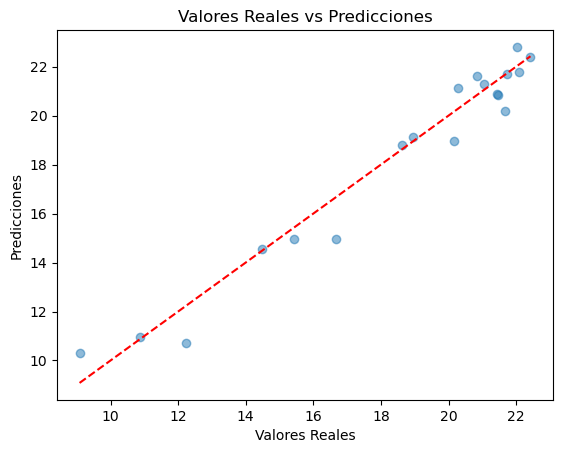

In [92]:
#Predichos vs residuos
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.show()

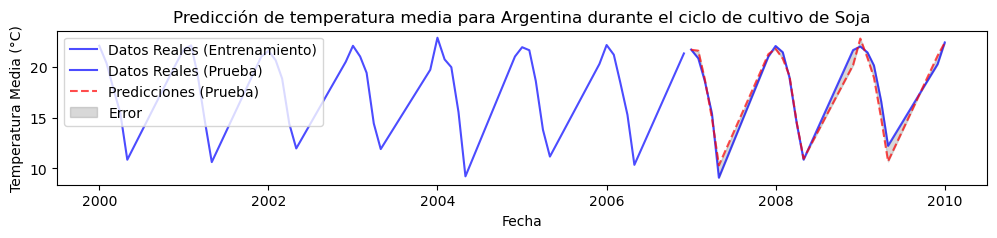

In [93]:
# Gráfico
plt.figure(figsize=(12, 2))    
plt.plot(DataSoja['dt'][:train_size], DataSoja['AverageTemperature'][:train_size], label='Datos Reales (Entrenamiento)', color='blue', alpha=0.7)    
plt.plot(test_data['dt'], y_test, label='Datos Reales (Prueba)', color='blue', alpha=0.7)
plt.plot(test_data['dt'], y_pred, label='Predicciones (Prueba)', color='red', linestyle='--', alpha=0.7)    
plt.fill_between(test_data['dt'], y_test, y_pred, color='gray', alpha=0.3, label='Error')    
plt.title(f'Predicción de temperatura media para Argentina durante el ciclo de cultivo de Soja')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Media (°C)')
plt.legend(loc='upper left')    
plt.show()

<p style="text-align: justify; line-height: 1.6;font-size:16px">
Del Análisis efectuardo se puede decir que Aunque el modelo predice bien las temperaturas generales, se deben monitorear los picos donde se observan temperaturas altas de calor extremo y los valles o bajas temperaturas para el cultivo. Debido a que estos eventos extremos pueden causar aborto de vainas o afectaciones en la floración de las plantas.</p>

<p style="text-align: justify; line-height: 1.6;font-size:16px">
Por lo que basandonos en el análisis de las predicciones de temperatura, las recomendaciones se centran en monitorear eventos extremos, aprovechar los patrones cíclicos para ajustar las fechas de siembra y cosecha, y adaptar las prácticas. Recomendación: Se pueden tomar acciones preventivas implementando estrategias de protección.</p>

<a name='8'></a>
## **8) Guardado de datos**
<p style="text-align: justify; line-height: 1.6; font-size:18px;">
Guardado del csv del data frame modificado a lo largo del trabajo final</p>

In [96]:
#Guardar CSV nuevo
# datos_ff.to_csv("analisis-climatico-limpio.csv", index=False)

<a name='9'></a>
## **9) Resultados Principales**

<p style="text-align: justify; line-height: 1.6;font-size:16px">
El análisis de las tendencias de temperatura media en países de América del Sur revela diferencias significativas vinculadas a factores geográficos y estacionales. Venezuela presenta temperaturas medias más cálidas debido a su ubicación tropical, mientras que Chile registra valores más fríos, influenciado por su geografía montañosa y su extensión longitudinal. En Argentina, las temperaturas medias históricas entre 2000 y 2010 varían entre 6°C y 24°C, reflejando una amplia variabilidad estacional.
</p>
<p style="text-align: justify; line-height: 1.6;font-size:16px">
Además, se observaron fluctuaciones térmicas entre -6°C y 6°C con respecto a la media histórica en los países analizados, lo que evidencia comportamientos climáticos asociados a estaciones específicas y fenómenos como El Niño y La Niña. Estas variaciones son normales dentro de un rango climático esperado, aunque tendencias a largo plazo podrían estar relacionadas con el cambio climático.
</p>

<p style="text-align: justify; line-height: 1.6;font-size:16px">
Los resultados de los experimentos realizados utilizando modelos de Machine Learning permiten realizar predicciones precisas de temperatura media. En particular, el modelo GradientBoostingRegressor mostró un desempeño superior en términos de precisión y tiempo de procesamiento:

1. **Primer Experimento:**
   - Se utilizó RandomForestRegressor con ajuste de hiperparámetros para predecir temperaturas medias de todos los países de la región. Su capacidad de generalización y manejo de datos faltantes resultó en un MSE de 2.48, MAE de 1.23 y RMSE de 1.57 para Argentina, demostrando un buen ajuste del modelo.

2. **Segundo Experimento:**
   - Se evaluaron diferentes modelos sin ajuste de hiperparámetros para la predicción de temperatura media en Argentina. AdaBoostRegressor fue el más rápido en entrenar y predecir (0.06 segundos), mientras que RandomForestRegressor fue el más lento (0.15 segundos). El modelo con mejor MSE fue GradientBoostingRegressor (MSE: 0.94), y el peor fue SVR (MSE: 13.93).

3. **Tercer Experimento:**
   - Se evaluó la predicción de temperaturas medias en Argentina durante el período de cultivo de soja en Argentina. El mejor modelo fue nuevamente GradientBoostingRegressor, con un MSE de 0.58 y tiempo de entrenamiento de 0.02 segundos, mientras que SVR mostró el peor desempeño (MSE: 13.06).

Finalmente, se realizó un ajuste de hiperparámetros utilizando GradientBoostingRegressor, logrando un MSE de 0.70, RMSE de 0.83, MAE de 0.64 y un R² de 0.95. A partir de estos resultados, se recomienda este modelo por su alta precisión y bajo tiempo de entrenamiento, constituyendo una herramienta robusta para la predicción de temperaturas medias en entornos climáticos complejos.

<a name='10'></a>
## **10) Conclusiones generales**


<p style="text-align: justify; line-height: 1.6; font-size:18px;">



<p style="text-align: justify; line-height: 1.6; font-size:18px;">
En este trabajo, aplicamos diversas herramientas de análisis y procesamiento de datos, fortaleciendo nuestras habilidades en el uso de bibliotecas como Pandas, Seaborn, Matplotlib y Scikit-learn para la manipulación, limpieza, exploración, visualización y modelado de datos. Estas herramientas nos permitieron estructurar el análisis de manera ordenada, identificar patrones y tendencias clave, enriqueciendo así nuestra comprensión del contexto de los datos.

<p style="text-align: justify; line-height: 1.6; font-size:18px;">
Pandas facilitó la organización y limpieza de los datos, permitiéndonos extraer conclusiones significativas sobre su estructura y variabilidad. Gracias a las visualizaciones generadas con Seaborn y Matplotlib, logramos obtener una visión clara del comportamiento de las variables, lo cual fue esencial para interpretar adecuadamente las características del conjunto de datos. Además, aplicamos técnicas de estadística descriptiva que nos permitieron calcular medidas de tendencia central y dispersión, estableciendo una base sólida para el análisis posterior.

<p style="text-align: justify; line-height: 1.6; font-size:18px;">
Por otro lado, Scikit-learn nos proporcionó herramientas avanzadas para modelar y evaluar la precisión del modelo, optimizando nuestra capacidad para interpretar relaciones entre variables y tomar decisiones informadas basadas en los datos.

<p style="text-align: justify; line-height: 1.6; font-size:18px;">
En conjunto, estas herramientas de análisis proporcionaron un marco integral para transformar los datos en información valiosa, fortaleciendo nuestra capacidad para interpretar resultados y fundamentar conclusiones basadas en evidencia cuantitativa. Este trabajo práctico no solo consolidó nuestro aprendizaje de las herramientas estudiadas en clase, sino que también nos permitió desarrollar un enfoque crítico en el análisis de datos, comprendiendo cómo cada técnica y herramienta contribuye a construir una perspectiva analítica completa y fundamentada.</p>

<a name='11'></a>
## **11) Referencias Bibliografica**

### **Base de Datos**  
- **Climate Change: Earth Surface Temperature Data**  
  [Climate Change: Earth Surface Temperature Data - Kaggle](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/code)  

### **Módulos Utilizados**  
- **Scikit-learn**  
  [Documentación Oficial de Scikit-learn](https://scikit-learn.org/stable/)
